In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_93ed5cd42b494d97a3d1ad0a80770fd1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Rg5x4xAIUEgKdrU12VDgkuVNsvHcWcwYy2JW4SYcBW1V',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_93ed5cd42b494d97a3d1ad0a80770fd1.get_object(Bucket='cerealanalysisbasedonratingsbyusi-donotdelete-pr-vnealzvaj0el9q',Key='cereal.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
data.drop(["name"],axis=1,inplace=True)

In [7]:
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [8]:
data.isnull().any()

mfr         False
type        False
calories    False
protein     False
fat         False
sodium      False
fiber       False
carbo       False
sugars      False
potass      False
vitamins    False
shelf       False
weight      False
cups        False
rating      False
dtype: bool

<AxesSubplot:>

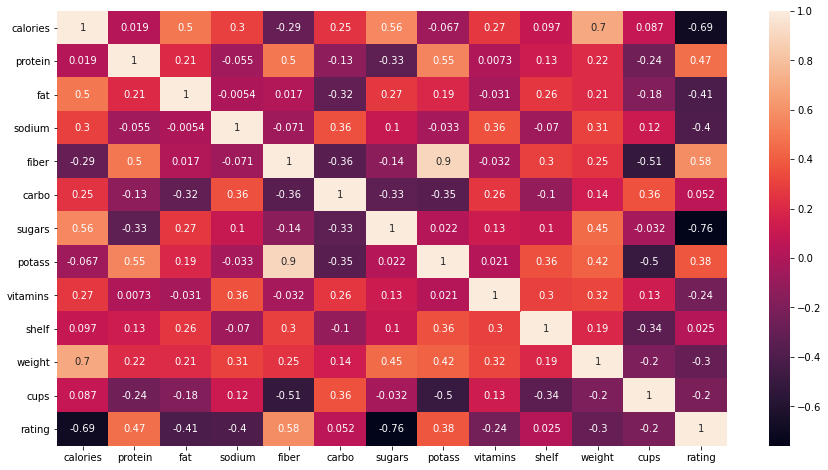

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot=True)

In [10]:
data.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


<AxesSubplot:xlabel='mfr', ylabel='rating'>

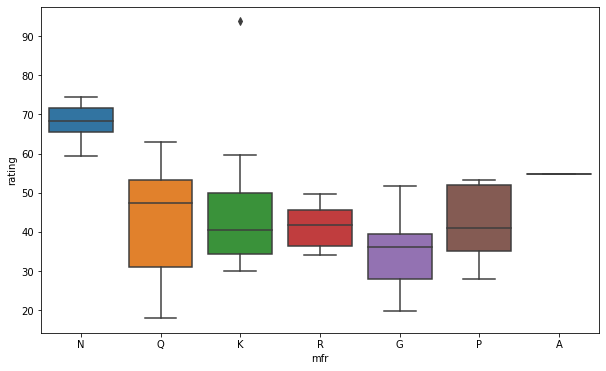

In [11]:
plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = "mfr", y = "rating")

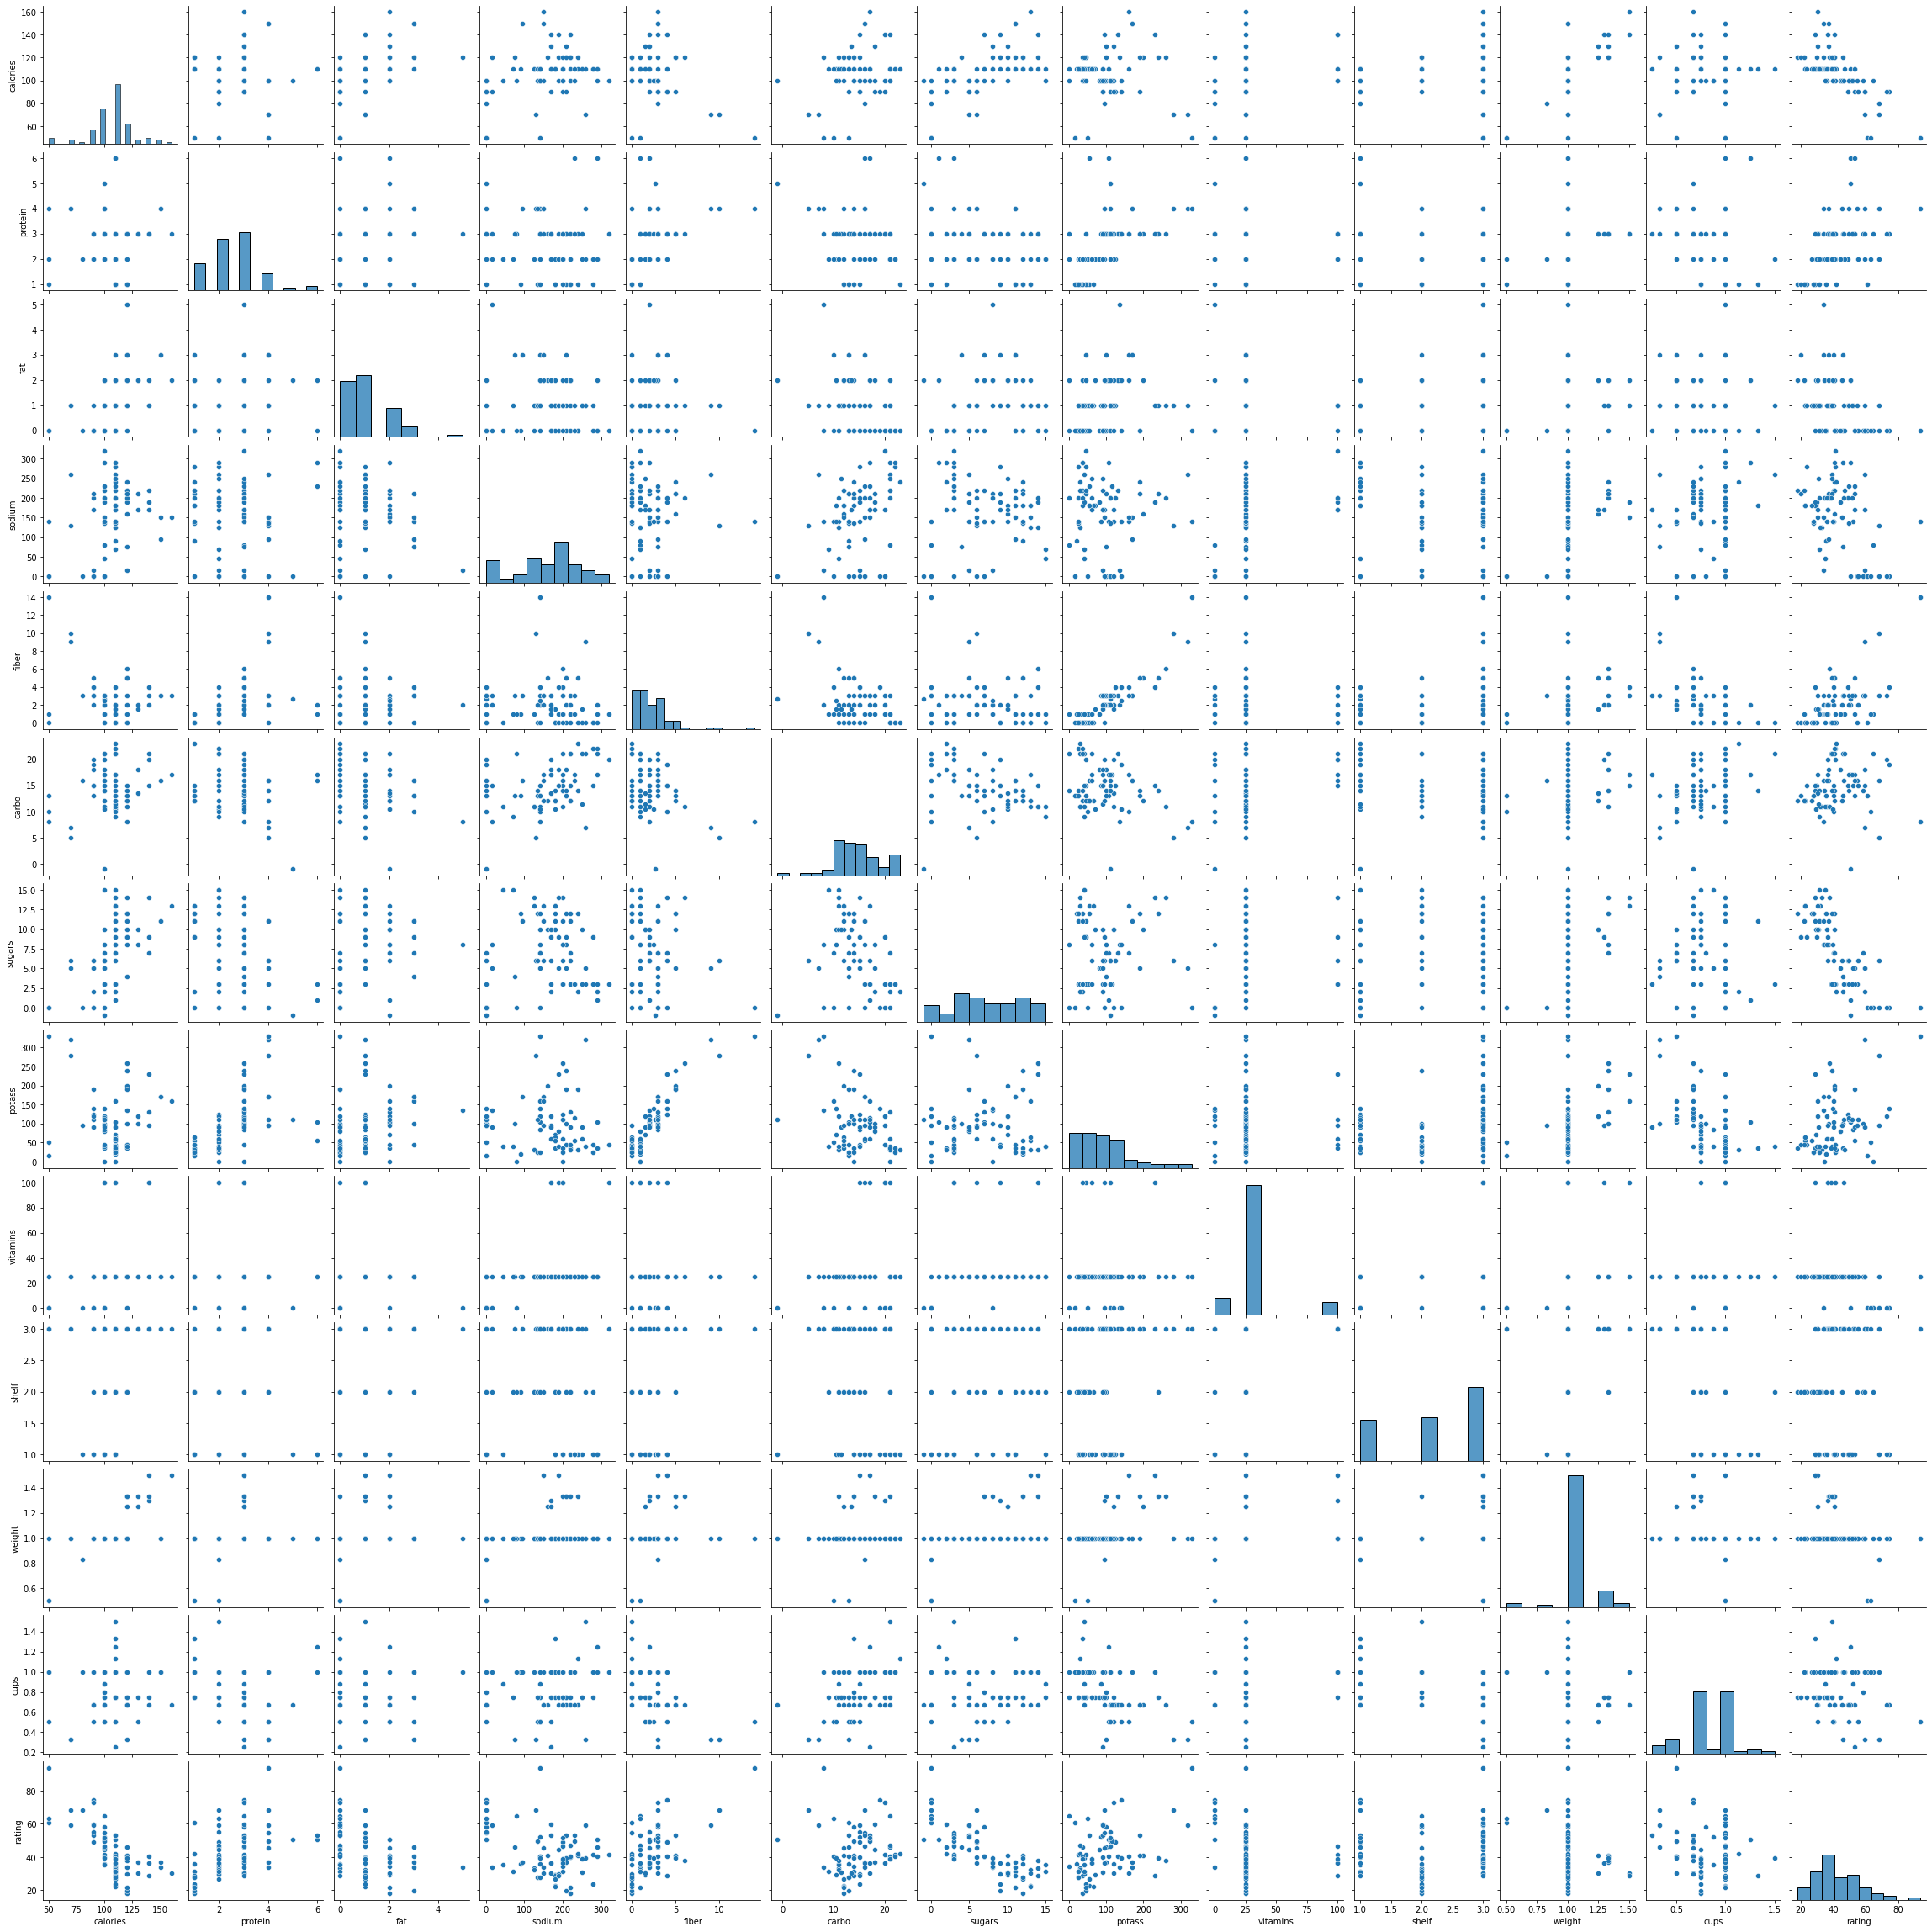

In [12]:
sns.pairplot(data = data, markers=["^","v"], palette="red")

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['mfr'] = le.fit_transform(data['mfr'])
data['type'] = le.fit_transform(data['type'])

In [14]:
data

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,3,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,5,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,2,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,6,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,1,0,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,6,0,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,1,0,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [15]:
x = data.iloc[:,0:14].values
y = data.iloc[:,14:15].values

In [16]:
x

array([[  3.  ,   0.  ,  70.  , ...,   3.  ,   1.  ,   0.33],
       [  5.  ,   0.  , 120.  , ...,   3.  ,   1.  ,   1.  ],
       [  2.  ,   0.  ,  70.  , ...,   3.  ,   1.  ,   0.33],
       ...,
       [  6.  ,   0.  , 100.  , ...,   1.  ,   1.  ,   0.67],
       [  1.  ,   0.  , 100.  , ...,   1.  ,   1.  ,   1.  ],
       [  1.  ,   0.  , 110.  , ...,   1.  ,   1.  ,   0.75]])

In [17]:
y

array([[68.402973],
       [33.983679],
       [59.425505],
       [93.704912],
       [34.384843],
       [29.509541],
       [33.174094],
       [37.038562],
       [49.120253],
       [53.313813],
       [18.042851],
       [50.764999],
       [19.823573],
       [40.400208],
       [22.736446],
       [41.445019],
       [45.863324],
       [35.782791],
       [22.396513],
       [40.448772],
       [64.533816],
       [46.895644],
       [36.176196],
       [44.330856],
       [32.207582],
       [31.435973],
       [58.345141],
       [40.917047],
       [41.015492],
       [28.025765],
       [35.252444],
       [23.804043],
       [52.076897],
       [53.371007],
       [45.811716],
       [21.871292],
       [31.072217],
       [28.742414],
       [36.523683],
       [36.471512],
       [39.241114],
       [45.328074],
       [26.734515],
       [54.850917],
       [37.136863],
       [34.139765],
       [30.313351],
       [40.105965],
       [29.924285],
       [40.69232 ],


In [18]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a = one.fit_transform(x[:,0:1]).toarray()
x = np.delete(x,[0],axis=1)
x = np.concatenate((a,x),axis=1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)
#random_state acts as the seed for the random number generator during the split

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr_pred = lr.predict(x_test)
lr_pred

array([[29.92428517],
       [49.78744507],
       [39.70339959],
       [60.75611161],
       [45.81171618],
       [58.3451415 ],
       [59.36399361],
       [53.37100755],
       [34.13976435],
       [38.8397453 ],
       [40.91704712],
       [55.33314186],
       [93.70491267],
       [26.73451534],
       [54.85091689],
       [37.03856175]])

In [22]:
y_p = lr.predict([[0,0,0,0,1,0,0,0,70,4,1,130,10,5,6,280,25,3,1,0.33]])
y_p

array([[68.40297324]])

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pred)

0.9999999999999992

In [24]:
import pickle
pickle.dump(lr,open('cerealanalysis.pkl','wb'))
model=pickle.load(open('cerealanalysis.pkl','rb'))

In [25]:
!pip install ibm_watson_machine_learning

In [26]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [27]:
import sklearn 
sklearn.__version__ 

'0.23.2'

In [28]:
pip install -U scikit-learn==0.23

     |████████████████████████████████| 7.2 MB 21.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [30]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"bJSrKnWH-dYvye3Ig4-MxTGXynisAZKTwdMhOaIXTXsk"
}
client = APIClient(wml_credentials)

In [31]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
9755e48d-9ec9-440d-9145-6149a09b89cf  cereal_space           2022-03-28T17:35:17.654Z
97c4a650-9bc6-4f16-a639-58ee60f2f874  CerealAnalysis_Space   2022-03-25T09:11:28.777Z
b0bbedd4-c7c8-4287-8343-1a606ba40c44  cereal_analysis_space  2022-03-08T10:43:29.378Z
------------------------------------  ---------------------  ------------------------


In [32]:
SPACE_ID="97c4a650-9bc6-4f16-a639-58ee60f2f874"

In [33]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [34]:
MODEL_NAME="Creal Analysis"
DEPLOYMENT_NAME="cereal deployment"
BEST_MODEL=lr

In [35]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name("default_py3.8")

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [36]:
#Save model
model_details = wml_client.repository.store_model(
    model= BEST_MODEL, 
    meta_props= model_props, 
    training_data = x_train, 
    training_target = y_train
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [37]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'},
      {'name': 'f7', 'type': 'float'},
      {'name': 'f8', 'type': 'float'},
      {'name': 'f9', 'type': 'float'},
      {'name': 'f10', 'type': 'float'},
      {'name': 'f11', 'type': 'float'},
      {'name': 'f12', 'type': 'float'},
      {'name': 'f13', 'type': 'float'},
      {'name': 'f14', 'type': 'float'},
      {'name': 'f15'

In [38]:
model_uid = wml_client.repository.get_model_id(model_details); model_uid

'6139e62c-c00d-4093-92b6-56d18c41c390'

In [39]:
wml_client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [40]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '6139e62c-c00d-4093-92b6-56d18c41c390' started

#######################################################################################


initializing